In [171]:
import cv2
import numpy as np
from math import acos,pi,sqrt
from matplotlib import pyplot as plt
from tkinter import *
from tkinter import filedialog
from PIL import ImageTk,Image


In [172]:
def compute_Hue(B,G,R):
    angle=0
    if B!=G!=R:
        angle=0.5*((R-G)+(R-B))/sqrt((R-G)*(R-G)+(R-B)*(G-B))
    return acos(angle) if B<=G else (2*pi - acos(angle))

In [173]:
#Color to HSI Convert
window=Tk()
window.title('Image Viewer')
src=cv2.imread(filedialog.askopenfilename(),cv2.IMREAD_COLOR)
window.mainloop()
height,width = src.shape[0],src.shape[1]

I=np.zeros((height,width))
S=np.zeros((height,width))
H=np.zeros((height,width))

for i in range(height):
    for j in range(width):
        B,G,R=src[i][j][0]/255., src[i][j][1]/255., src[i][j][2]/255.
        I[i][j]=(B+G+R)/3.
        if B+G+R !=0:
            S[i][j]=1-3*np.min([B,G,R])/(B+G+R)
        H[i][j]=compute_Hue(B,G,R)
dst=np.zeros((height,width,3),dtype=np.uint8)
for i in range(height):
    for j in range(width):
        if H[i][j]>=0.25 and H[i][j] <=0.6:
            dst[i][j]=src[i][j]
cv2.imshow("dst", dst)
cv2.imshow("src",src)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [174]:
#HSI Normalize
I=I*255
S=S*255
H=H*255/(2*pi)
I=np.asarray(I,dtype=np.uint8)
S=np.asarray(S,dtype=np.uint8)
H=np.asarray(H,dtype=np.uint8)

cv2.imshow("src",src)
cv2.imshow("H",H)
cv2.imshow("S",S)
cv2.imshow("I",I)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [175]:
#Histogram Equalization
src2=cv2.equalizeHist(I)
I=cv2.resize(I,(400,400))
src2=cv2.resize(src2,(400,400))
dst2=np.hstack((I,src2))
cv2.imshow('img',dst2)
cv2.waitKey()
cv2.destroyAllWindows()

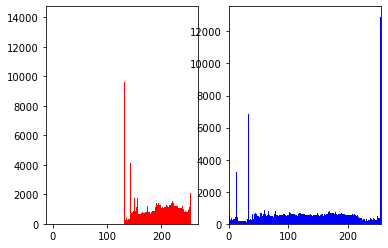

In [177]:
plt.subplot(1,2,1)
plt.hist(I.flatten(),256,[0,255],color='r')
plt.subplot(1,2,2)
plt.hist(src2.flatten(),256,[0,255], color = 'b')
plt.xlim([0,255])
plt.show()


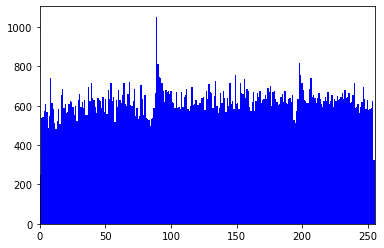

In [169]:
#PowerGamma
src=cv2.resize(src,(400,400))
gammaExam=np.array(255*(src/255)**0.2,dtype='uint8')
gammaExam2=np.array(255*(src/255)**0.4,dtype='uint8')
gammaExam3=np.array(255*(src/255)**2.2,dtype='uint8')
gammaExam4=np.array(255*(src/255)**3.0,dtype='uint8')


dst3=np.hstack((src,gammaExam,gammaExam2,gammaExam3,gammaExam4))
cv2.imshow('GAMPOW',dst3)
cv2.waitKey(0)

-1

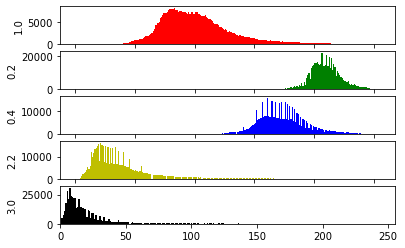

In [170]:
plt.subplot(5,1,1)
plt.ylabel("1.0")
plt.hist(src.flatten(),256,[0,255],color='r')
plt.subplot(5,1,2)
plt.ylabel("0.2")
plt.hist(gammaExam.flatten(),256,[0,255],color='g')
plt.subplot(5,1,3)
plt.ylabel("0.4")
plt.hist(gammaExam2.flatten(),256,[0,255],color='b')
plt.subplot(5,1,4)
plt.ylabel("2.2")
plt.hist(gammaExam3.flatten(),256,[0,255],color='y')
plt.subplot(5,1,5)
plt.ylabel("3.0")
plt.hist(gammaExam4.flatten(),256,[0,255],color='k')
plt.xlim([0,255])
plt.show()


plt.show()

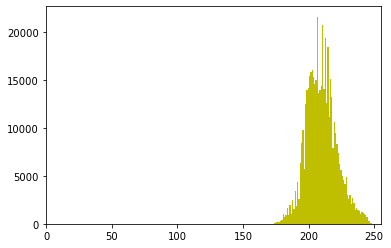

In [143]:
plt.hist(gammaExam2.flatten(),256,[0,255],color='y')
plt.xlim([0,255])
plt.show()

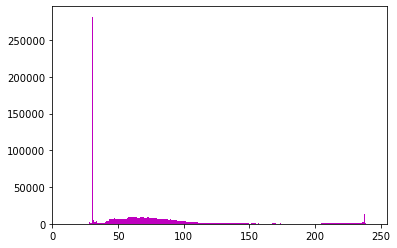

In [114]:
negative=255-src
dst4=np.hstack((src,negative))
cv2.imshow('NEG',dst4)
cv2.waitKey(0)
plt.hist(src.flatten(),256,[0,255],color='m')
plt.xlim([0,255])
plt.show()

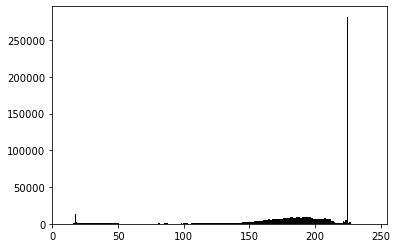

In [108]:
plt.hist(negative.flatten(),256,[0,255],color='k')
plt.xlim([0,255])
plt.show()